In [1]:
from commonfunctions import *
import skimage
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
def paper_binary_transfer(gray_image): # gray-scale from 0-1
    return_image = np.copy(gray_image)
    thresh = threshold_otsu(return_image)
    for i in range(0,gray_image.shape[0]):
        for j in range(0,gray_image.shape[1]):
            if gray_image[i][j] > thresh :
                return_image[i][j] = 0
            else :
                return_image[i][j] = 1
                
    return return_image

In [5]:
def make_it_white_background(rgb_image, binarized_image ):
    return_image_rgb = np.copy((rgb_image))
    for i in range (0,binarized_image.shape[0]):
        for j in range(0,binarized_image.shape[1]):
            if binarized_image[i][j] == 1:
                return_image_rgb[i][j] = rgb_image[i][j]
            else:
                return_image_rgb[i][j] = [255,255,255]
                
    return return_image_rgb

Enter name of the input image: case4
Creation of the directory C:\Users\mahmo\Documents\Image processing\project\case4_Colored failed


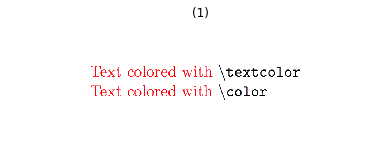

[255, 255, 255]
dict_keys(['[156 144 128]', '[81 48  0]', '[ 26  74 114]', '[91 67 33]', '[ 0  0 62]', '[134 166 201]', '[255 127 114]', '[255 100  98]', '[255  87  92]', '[255  70 107]', '[255 117 117]', '[135 105  83]', '[16  0  0]', '[ 87 129 170]', '[255  51  57]', '[255  43  38]', '[255  55  86]', '[255  53   0]', '[255   0   0]', '[255   0  33]', '[255 135 168]', '[255  23  29]', '[255 103 126]', '[255 124 157]', '[67 33  0]', '[ 0 48 92]', '[255 118 106]', '[255  20  13]', '[255 125  89]', '[255  41  80]', '[255 139 139]', '[255  97  64]', '[255   0  46]', '[255 129 103]', '[255  31  25]', '[255 114  75]', '[255   0  21]', '[ 0  0 38]', '[255  99  90]', '[255 104 142]', '[255  69  49]', '[255 120 167]', '[255 100  56]', '[166 113  96]', '[37  0  0]', '[ 52 108 157]', '[155 156 157]', '[255  98 133]', '[255  80  75]', '[255  75  48]', '[255  75 117]', '[255 110 144]', '[75 52 16]', '[ 0 38 96]', '[150 122  91]', '[57 49 43]', '[36 37 38]', '[ 99 131 153]', '[113 101  75]', '[0 0 

In [20]:
input_name = input("Enter name of the input image: ")
input_path  = "colored_cases/" + input_name + ".jpeg"

path = os.getcwd()
path = str(path+"\\"+input_name+"_Colored")
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

    
input_image_rgb = np.array(io.imread(input_path))
#print("Image rgb shape" , input_image_rgb.shape)
#print("input image rgb" , input_image_rgb)

gray_scale_image = np.array((rgb2gray(input_image_rgb) * 255).astype(np.uint8))
gray_scale_image = gray_scale_image / 255

my_final_img = paper_binary_transfer(gray_scale_image)

white_background_image = make_it_white_background(input_image_rgb,my_final_img)
show_images([white_background_image])
colors_in_pic = {}
print(list(white_background_image[100][100]))
for i in range(0,my_final_img.shape[0]):
    for j in range(0, my_final_img.shape[1]):
        if list(white_background_image[i][j]) != [255,255,255]:
            current_color = str(white_background_image[i][j])
            if current_color in colors_in_pic:
                colors_in_pic[current_color].append([i,j])
            else:
                colors_in_pic[current_color] = []
                colors_in_pic[current_color].append([i,j])
                
print(colors_in_pic.keys())
            
